### Geting data from API with topics

In [3]:
import requests  ## for getting data from a server GET
import re   ## for regular expressions
import pandas as pd    ## for dataframes and related
from pandas import DataFrame

## To tokenize and vectorize text type data
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
## For word clouds
## conda install -c conda-forge wordcloud
## May also have to run conda update --all on cmd
#import PIL
#import Pillow
#import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
#from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz

from sklearn.decomposition import LatentDirichletAllocation 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn
from sklearn.cluster import KMeans

from sklearn import preprocessing

import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

In [4]:
# Now we want the data about below 4 topics:

#topics=["politics", "analytics", "business", "sports"]

topics=["musk", "buffet", "gates", "bezos"]


In [10]:
#### First -----------------------------------------> create empty excel

## Create a new csv file to save the headlines
filename="NewHeadlines3.csv"
MyFILE=open(filename,"w")  # "a"  for append   "r" for read
## with open
### Place the column names in - write to the first row
WriteThis="LABEL,Date,Source,Headline\n"
MyFILE.write(WriteThis)
MyFILE.close()

In [11]:
endpoint="https://newsapi.org/v2/everything"

In [12]:
#### First--------------------> itiratively GATHER the data in JSON format for each topic and itiratively append it in our excel
# for each article in out data.

for topic in topics:

    ## Dictionary Structure
    URLPost = {'apiKey':'8f4134f7d0de43b8b49f91e22100f22b',
               'q':topic
    }

    response=requests.get(endpoint, URLPost)
    print(response)
    jsontxt = response.json()
    print(jsontxt)
    #####################################################
    ## Open the file for append
    
    MyFILE=open(filename, "a")
    LABEL=topic
    
    for items in jsontxt["articles"]:
        
        Source=items["source"]["name"]
        print(Source)
      
        Date=items["publishedAt"]
        NewDate=Date.split("T")
        Date=NewDate[0]
        print(Date)
        
        Headline=items["description"]
        Headline=str(Headline)
        Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
        Headline=Headline.replace(',', '')
        Headline=' '.join(Headline.split())
        Headline=re.sub("\n|\r", "", Headline)
        print(Headline)
        
        WriteThis=str(LABEL)+","+str(Date)+","+str(Source)+"," + str(Headline) + "\n"
        
        MyFILE.write(WriteThis)
        
    ## CLOSE THE FILE
    MyFILE.close()

<Response [200]>
{'status': 'ok', 'totalResults': 10301, 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'}, 'author': 'Elizabeth Lopatto', 'title': 'OpenAI says Elon Musk wanted ‘absolute control’ of the company', 'description': 'OpenAI has responded to a lawsuit filed by Elon Musk, saying Musk supported a closed-source, for-profit venture but wanted total control over it.', 'url': 'https://www.theverge.com/2024/3/5/24091773/openai-response-elon-musk-breach-of-contract-lawsuit', 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mu1msO0wrGzvOzp11GRF5P0JZKI=/0x0:2040x1360/1200x628/filters:focal(1020x680:1021x681)/cdn.vox-cdn.com/uploads/chorus_asset/file/23382325/VRG_Illo_STK022_K_Radtke_Musk_Money.jpg', 'publishedAt': '2024-03-06T02:47:15Z', 'content': 'OpenAI says Elon Musk wanted absolute control of the company\r\nOpenAI says Elon Musk wanted absolute control of the company\r\n / It will move to dismiss all of Musks claims from a breach of contract la… [+2076 chars]'}, {'s

<Response [200]>
{'status': 'ok', 'totalResults': 1732, 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'}, 'author': 'Justine Calma', 'title': 'A Big Tech-backed campaign to plant trees might have taken a wrong turn', 'description': 'Are tree planting campaigns threatening Africa’s grasslands?\xa0An analysis published in the journal Science says a forest restoration initiative backed by Meta and the Bezos Earth Fund could be planting trees where they shouldn’t be.', 'url': 'https://www.theverge.com/24072029/tree-planting-campaign-afr100-forests-science-critique', 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/EmdpNrdKCZRfI8aZHWXm-6IShuI=/0x0:5130x3414/1200x628/filters:focal(2565x1707:2566x1708)/cdn.vox-cdn.com/uploads/chorus_asset/file/25287681/1371856480.jpg', 'publishedAt': '2024-02-15T19:00:00Z', 'content': 'A Big Tech-backed campaign to plant trees might have taken a wrong turn\r\nA Big Tech-backed campaign to plant trees might have taken a wrong turn\r\n / A new ana

In [79]:
#### Third -------------------------------------> read csv into DF
BBC_DF = pd.read_csv(filename, encoding='ISO-8859-1')
BBC_DF

,LABEL,Date,Source,Headline
0,musk,2024-03-06,The Verge,OpenAI has responded to a lawsuit filed by Elo...
1,musk,2024-02-11,Engadget,In a followup to a tentative ruling made in De...
2,musk,2024-02-14,Wired,Last summer Elon Musk began rate limiting the ...
3,musk,2024-03-07,The Verge,What s new and missing in Apple s new MacBook ...
4,musk,2024-02-21,Wired,Elon Musk says Neuralink s first human trial s...
...,...,...,...,...
395,bezos,2024-02-13,Biztoc.com,The multibillionaire Jeff Bezos and his fiance...
396,bezos,2024-02-15,Biztoc.com,Euronews takes a closer look at why Jeff Bezos...
397,bezos,2024-03-04,Quartz India,A new satellite may soon usher in a more moder...
398,bezos,2024-03-06,Twistedsifter.com,Paging Jeff Bezos


In [112]:
df_Musk = BBC_DF[BBC_DF["LABEL"] == "musk"]

df_Musk = BBC_DF.drop(["Date", "Source"], axis =1)
df_Musk.head(5)

,LABEL,Headline
0,musk,OpenAI has responded to a lawsuit filed by Elo...
1,musk,In a followup to a tentative ruling made in De...
2,musk,Last summer Elon Musk began rate limiting the ...
3,musk,What s new and missing in Apple s new MacBook ...
4,musk,Elon Musk says Neuralink s first human trial s...


#### Preprocessing

In [113]:
#Third------------------------------------------------------> PROCESS THE FILE to tokaniza and vectorize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords  # Import stopwords module from NLTK

# List of words to remove

# Combine custom words to remove with English stopwords
stopwords_list = list(set(words_to_remove + stopwords.words('english')))

# Now you can proceed with your code


In [156]:
import string

# Create the 'no_punc' column by converting the 'Headline' column to lowercase
df_Musk = df_Musk.dropna()
df_Musk["no_punc"] = df_Musk["Headline"].str.lower()

# Define the function to remove punctuation and numbers
def remove_punct_num(text):
    if isinstance(text, str):  # Check if text is a string and not NaN
        text  = "".join([char for char in text if char not in string.punctuation])
        text = re.sub('[0-9]+', '', text)
    return text

# Apply the remove_punct_num function to the 'no_punc' column
df_Musk['no_punc_new'] = df_Musk['no_punc'].apply(remove_punct_num)

# Display the DataFrame
df_Musk


,LABEL,Headline,no_punc,no_punc_new,no_stop_word,stemmed,cleaned,tokenized
0,musk,OpenAI has responded to a lawsuit filed by Elo...,openai has responded to a lawsuit filed by elo...,openai has responded to a lawsuit filed by elo...,openai has responded to a lawsuit filed by elo...,"[openai, ha, respond, to, a, lawsuit, file, by...",openai ha respond to a lawsuit file by elon mu...,"[openai, has, responded, to, a, lawsuit, filed..."
1,musk,In a followup to a tentative ruling made in De...,in a followup to a tentative ruling made in de...,in a followup to a tentative ruling made in de...,in a followup to a tentative ruling made in de...,"[in, a, followup, to, a, tent, rule, made, in,...",in a followup to a tent rule made in decemb a ...,"[in, a, followup, to, a, tentative, ruling, ma..."
2,musk,Last summer Elon Musk began rate limiting the ...,last summer elon musk began rate limiting the ...,last summer elon musk began rate limiting the ...,last summer elon musk began rate limiting the ...,"[last, summer, elon, musk, began, rate, limit,...",last summer elon musk began rate limit the num...,"[last, summer, elon, musk, began, rate, limiti..."
3,musk,What s new and missing in Apple s new MacBook ...,what s new and missing in apple s new macbook ...,what s new and missing in apple s new macbook ...,what s new and missing in apple s new macbook ...,"[what, s, new, and, miss, in, appl, s, new, ma...",what s new and miss in appl s new macbook lapt...,"[what, s, new, and, missing, in, apple, s, new..."
4,musk,Elon Musk says Neuralink s first human trial s...,elon musk says neuralink s first human trial s...,elon musk says neuralink s first human trial s...,elon musk says neuralink s first human trial s...,"[elon, musk, say, neuralink, s, first, human, ...",elon musk say neuralink s first human trial su...,"[elon, musk, says, neuralink, s, first, human,..."
...,...,...,...,...,...,...,...,...
395,bezos,The multibillionaire Jeff Bezos and his fiance...,the multibillionaire jeff bezos and his fiance...,the multibillionaire jeff bezos and his fiance...,the multibillionaire jeff bezos and his fiance...,"[the, multibillionair, jeff, bezo, and, hi, fi...",the multibillionair jeff bezo and hi fiance la...,"[the, multibillionaire, jeff, bezos, and, his,..."
396,bezos,Euronews takes a closer look at why Jeff Bezos...,euronews takes a closer look at why jeff bezos...,euronews takes a closer look at why jeff bezos...,euronews takes a closer look at why jeff bezos...,"[euronew, take, a, closer, look, at, whi, jeff...",euronew take a closer look at whi jeff bezo mi...,"[euronews, takes, a, closer, look, at, why, je..."
397,bezos,A new satellite may soon usher in a more moder...,a new satellite may soon usher in a more moder...,a new satellite may soon usher in a more moder...,a new satellite may soon usher in a more moder...,"[a, new, satellit, may, soon, usher, in, a, mo...",a new satellit may soon usher in a more modern...,"[a, new, satellite, may, soon, usher, in, a, m..."
398,bezos,Paging Jeff Bezos,paging jeff bezos,paging jeff bezos,paging jeff bezos,"[page, jeff, bezo]",page jeff bezo,"[paging, jeff, bezos]"


In [124]:
import numpy as np

# Create the 'no_punc' column by converting the 'Headline' column to lowercase
df_Musk["no_punc"] = df_Musk["Headline"].str.lower()

# Define the function to remove punctuation and numbers
def remove_punct_num(text):
    if isinstance(text, str):  # Check if text is a string and not NaN
        text  = "".join([char for char in text if char not in string.punctuation])
        text = re.sub('[0-9]+', '', text)
    return text

# Apply the remove_punct_num function to the 'no_punc' column
df_Musk['no_punc_new'] = df_Musk['no_punc'].apply(remove_punct_num)

# Define the function to remove stopwords

words_to_remove = ['aban', 'abbia', 'abwerfen', 'ac', 'al', 'el', 'que', 'en', 'las', 'los', "la", "le", "di", "elon", "jeff", "microsoft", "buffet", "th",
                  "del", "es", "por", "como", "su", "est", "una", "para", "ha", "mundo", "da", "mais", "se", "em", "la"]

def remove_stopwords(text):
    if isinstance(text, list):  # Check if text is a list and not NaN
        text = [word for word in text if word not in words_to_remove]
    return text

# Apply the remove_stopwords function to the 'no_punc_new' column
df_Musk["no_stop_word"] = df_Musk['no_punc_new'].apply(remove_stopwords)

# Display the DataFrame
df_Musk.head(50)


,LABEL,Headline,no_punc,no_punc_new,no_stop_word
0,musk,OpenAI has responded to a lawsuit filed by Elo...,openai has responded to a lawsuit filed by elo...,openai has responded to a lawsuit filed by elo...,openai has responded to a lawsuit filed by elo...
1,musk,In a followup to a tentative ruling made in De...,in a followup to a tentative ruling made in de...,in a followup to a tentative ruling made in de...,in a followup to a tentative ruling made in de...
2,musk,Last summer Elon Musk began rate limiting the ...,last summer elon musk began rate limiting the ...,last summer elon musk began rate limiting the ...,last summer elon musk began rate limiting the ...
3,musk,What s new and missing in Apple s new MacBook ...,what s new and missing in apple s new macbook ...,what s new and missing in apple s new macbook ...,what s new and missing in apple s new macbook ...
4,musk,Elon Musk says Neuralink s first human trial s...,elon musk says neuralink s first human trial s...,elon musk says neuralink s first human trial s...,elon musk says neuralink s first human trial s...
5,musk,The Food and Drug Administration has given the...,the food and drug administration has given the...,the food and drug administration has given the...,the food and drug administration has given the...
6,musk,The creator of a popular Nintendo Switch emula...,the creator of a popular nintendo switch emula...,the creator of a popular nintendo switch emula...,the creator of a popular nintendo switch emula...
7,musk,X has once again quietly changed its rules aro...,x has once again quietly changed its rules aro...,x has once again quietly changed its rules aro...,x has once again quietly changed its rules aro...
8,musk,AI chips from startup Groq allow chatbots to a...,ai chips from startup groq allow chatbots to a...,ai chips from startup groq allow chatbots to a...,ai chips from startup groq allow chatbots to a...
9,musk,Journalists creators and long winded VCs on X ...,journalists creators and long winded vcs on x ...,journalists creators and long winded vcs on x ...,journalists creators and long winded vcs on x ...


In [151]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df_Musk["tokenized"] = df_Musk["no_stop_word"].apply(tokenization)
df_Musk.head()

,LABEL,Headline,no_punc,no_punc_new,no_stop_word,stemmed,cleaned,tokenized
0,musk,OpenAI has responded to a lawsuit filed by Elo...,openai has responded to a lawsuit filed by elo...,openai has responded to a lawsuit filed by elo...,openai has responded to a lawsuit filed by elo...,"[o, p, e, n, a, i, , h, a, s, , r, e, s, p, ...",o p e n a i h a s r e s p o n d e d t o ...,"[openai, has, responded, to, a, lawsuit, filed..."
1,musk,In a followup to a tentative ruling made in De...,in a followup to a tentative ruling made in de...,in a followup to a tentative ruling made in de...,in a followup to a tentative ruling made in de...,"[i, n, , a, , f, o, l, l, o, w, u, p, , t, ...",i n a f o l l o w u p t o a t e n t ...,"[in, a, followup, to, a, tentative, ruling, ma..."
2,musk,Last summer Elon Musk began rate limiting the ...,last summer elon musk began rate limiting the ...,last summer elon musk began rate limiting the ...,last summer elon musk began rate limiting the ...,"[l, a, s, t, , s, u, m, m, e, r, , e, l, o, ...",l a s t s u m m e r e l o n m u s k b ...,"[last, summer, elon, musk, began, rate, limiti..."
3,musk,What s new and missing in Apple s new MacBook ...,what s new and missing in apple s new macbook ...,what s new and missing in apple s new macbook ...,what s new and missing in apple s new macbook ...,"[w, h, a, t, , s, , n, e, w, , a, n, d, , ...",w h a t s n e w a n d m i s s i n g ...,"[what, s, new, and, missing, in, apple, s, new..."
4,musk,Elon Musk says Neuralink s first human trial s...,elon musk says neuralink s first human trial s...,elon musk says neuralink s first human trial s...,elon musk says neuralink s first human trial s...,"[e, l, o, n, , m, u, s, k, , s, a, y, s, , ...",e l o n m u s k s a y s n e u r a l i n ...,"[elon, musk, says, neuralink, s, first, human,..."


In [152]:
# May / May not use this resulst depends on data and requirement
import nltk
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df_Musk['stemmed'] = df_Musk['tokenized'].apply(stemming)
df_Musk.head()

,LABEL,Headline,no_punc,no_punc_new,no_stop_word,stemmed,cleaned,tokenized
0,musk,OpenAI has responded to a lawsuit filed by Elo...,openai has responded to a lawsuit filed by elo...,openai has responded to a lawsuit filed by elo...,openai has responded to a lawsuit filed by elo...,"[openai, ha, respond, to, a, lawsuit, file, by...",o p e n a i h a s r e s p o n d e d t o ...,"[openai, has, responded, to, a, lawsuit, filed..."
1,musk,In a followup to a tentative ruling made in De...,in a followup to a tentative ruling made in de...,in a followup to a tentative ruling made in de...,in a followup to a tentative ruling made in de...,"[in, a, followup, to, a, tent, rule, made, in,...",i n a f o l l o w u p t o a t e n t ...,"[in, a, followup, to, a, tentative, ruling, ma..."
2,musk,Last summer Elon Musk began rate limiting the ...,last summer elon musk began rate limiting the ...,last summer elon musk began rate limiting the ...,last summer elon musk began rate limiting the ...,"[last, summer, elon, musk, began, rate, limit,...",l a s t s u m m e r e l o n m u s k b ...,"[last, summer, elon, musk, began, rate, limiti..."
3,musk,What s new and missing in Apple s new MacBook ...,what s new and missing in apple s new macbook ...,what s new and missing in apple s new macbook ...,what s new and missing in apple s new macbook ...,"[what, s, new, and, miss, in, appl, s, new, ma...",w h a t s n e w a n d m i s s i n g ...,"[what, s, new, and, missing, in, apple, s, new..."
4,musk,Elon Musk says Neuralink s first human trial s...,elon musk says neuralink s first human trial s...,elon musk says neuralink s first human trial s...,elon musk says neuralink s first human trial s...,"[elon, musk, say, neuralink, s, first, human, ...",e l o n m u s k s a y s n e u r a l i n ...,"[elon, musk, says, neuralink, s, first, human,..."


In [153]:
df_Musk["cleaned"] = df_Musk["stemmed"].apply(lambda x: " ".join(x))
df_Musk

,LABEL,Headline,no_punc,no_punc_new,no_stop_word,stemmed,cleaned,tokenized
0,musk,OpenAI has responded to a lawsuit filed by Elo...,openai has responded to a lawsuit filed by elo...,openai has responded to a lawsuit filed by elo...,openai has responded to a lawsuit filed by elo...,"[openai, ha, respond, to, a, lawsuit, file, by...",openai ha respond to a lawsuit file by elon mu...,"[openai, has, responded, to, a, lawsuit, filed..."
1,musk,In a followup to a tentative ruling made in De...,in a followup to a tentative ruling made in de...,in a followup to a tentative ruling made in de...,in a followup to a tentative ruling made in de...,"[in, a, followup, to, a, tent, rule, made, in,...",in a followup to a tent rule made in decemb a ...,"[in, a, followup, to, a, tentative, ruling, ma..."
2,musk,Last summer Elon Musk began rate limiting the ...,last summer elon musk began rate limiting the ...,last summer elon musk began rate limiting the ...,last summer elon musk began rate limiting the ...,"[last, summer, elon, musk, began, rate, limit,...",last summer elon musk began rate limit the num...,"[last, summer, elon, musk, began, rate, limiti..."
3,musk,What s new and missing in Apple s new MacBook ...,what s new and missing in apple s new macbook ...,what s new and missing in apple s new macbook ...,what s new and missing in apple s new macbook ...,"[what, s, new, and, miss, in, appl, s, new, ma...",what s new and miss in appl s new macbook lapt...,"[what, s, new, and, missing, in, apple, s, new..."
4,musk,Elon Musk says Neuralink s first human trial s...,elon musk says neuralink s first human trial s...,elon musk says neuralink s first human trial s...,elon musk says neuralink s first human trial s...,"[elon, musk, say, neuralink, s, first, human, ...",elon musk say neuralink s first human trial su...,"[elon, musk, says, neuralink, s, first, human,..."
...,...,...,...,...,...,...,...,...
395,bezos,The multibillionaire Jeff Bezos and his fiance...,the multibillionaire jeff bezos and his fiance...,the multibillionaire jeff bezos and his fiance...,the multibillionaire jeff bezos and his fiance...,"[the, multibillionair, jeff, bezo, and, hi, fi...",the multibillionair jeff bezo and hi fiance la...,"[the, multibillionaire, jeff, bezos, and, his,..."
396,bezos,Euronews takes a closer look at why Jeff Bezos...,euronews takes a closer look at why jeff bezos...,euronews takes a closer look at why jeff bezos...,euronews takes a closer look at why jeff bezos...,"[euronew, take, a, closer, look, at, whi, jeff...",euronew take a closer look at whi jeff bezo mi...,"[euronews, takes, a, closer, look, at, why, je..."
397,bezos,A new satellite may soon usher in a more moder...,a new satellite may soon usher in a more moder...,a new satellite may soon usher in a more moder...,a new satellite may soon usher in a more moder...,"[a, new, satellit, may, soon, usher, in, a, mo...",a new satellit may soon usher in a more modern...,"[a, new, satellite, may, soon, usher, in, a, m..."
398,bezos,Paging Jeff Bezos,paging jeff bezos,paging jeff bezos,paging jeff bezos,"[page, jeff, bezo]",page jeff bezo,"[paging, jeff, bezos]"


### CountVectorizer

In [154]:
#Instantiating CountVectorizer by entering the required values
countVectorizer = CountVectorizer(max_df=500, min_df=1, max_features=50, token_pattern=r'\b\w{3,}\b', strip_accents="ascii")

#Using the CountVectorizer for our Dataframe's column
countVector = countVectorizer.fit_transform(df_Musk["cleaned"])

#Creating new Dataframe and storing the data in it
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names_out())

#Storing Feature Names:
ColumnNames=countVectorizer.get_feature_names_out()

count_vect_df.head()



,about,after,amazon,and,appear,are,been,bezo,billion,billionair,...,the,their,thi,week,will,with,world,worth,year,you
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,0,0,0,0,0,0,...,2,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,...,3,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0


In [160]:
import seaborn as sns
from collections import Counter

new_pos = df_Musk["cleaned"].str.split()
new_pos = new_pos.values.tolist()

#new_neg = df_reviews_neg['reviews_cleaned'].str.split()
#new_neg = new_neg.values.tolist()

corpus_pos = [word for i in new_pos for word in i]
#corpus_neg = [word for i in new_neg for word in i]

np.save("words_to_remove", remove_stopwords)

def plot_unigram_bar(corpus, sentiment):
    counter=Counter(corpus)
    most=counter.most_common()

    x, y= [], []
    for word,count in most[:40]:
        if (word not in remove_stopwords):
            x.append(word)
            y.append(count)

    #sns.barplot(x=y,y=x)
    df_bar_unigram = pd.DataFrame(list(zip(x,y)), columns = ["word", "freq"])
    fig = px.bar(df_bar_unigram, x="freq", y="word", orientation='h',
                title= "Word Distribution for %s"%sentiment)    
    fig.show()


In [161]:
from nltk.util import ngrams
from nltk.corpus import stopwords
def plot_top_ngrams_barchart(text, title_, n=2 ):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    df_bar_ngram = pd.DataFrame(list(zip(x,y)), columns = ["word", "freq"])
    fig = px.bar(df_bar_ngram, x="freq", y="word", orientation='h', title=title_)
    fig.show()
    sns.barplot(x=y,y=x)

In [ ]:
## Converting the labels from list to df
Labels_DF = DataFrame(LabelLIST,columns=['LABEL'])

## Check your new DF and you new Labels df:
print(Labels_DF)
print(count_vect_df.iloc[:,0:6])

##Save original DF - without the lables
My_Orig_DF=count_vect_df
My_Orig_DF.head(5)


dfs = [Labels_DF, My_Orig_DF]
Final_News_DF_Labeled = pd.concat(dfs,axis=1, join='inner')


In [170]:
from wordcloud import WordCloud, STOPWORDS
def plot_word_cloud(corpus):
    wordcloud = WordCloud(
            background_color='white',
            stopwords=set(STOPWORDS),
            max_words=250,
            max_font_size=30, 
            scale=3,
            random_state=1)

    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

[<wordcloud.wordcloud.WordCloud object at 0x000001C244ACF710>, <wordcloud.wordcloud.WordCloud object at 0x000001C23A88F9D0>, <wordcloud.wordcloud.WordCloud object at 0x000001C24293E350>, <wordcloud.wordcloud.WordCloud object at 0x000001C24331FBD0>]
0
1
2
3


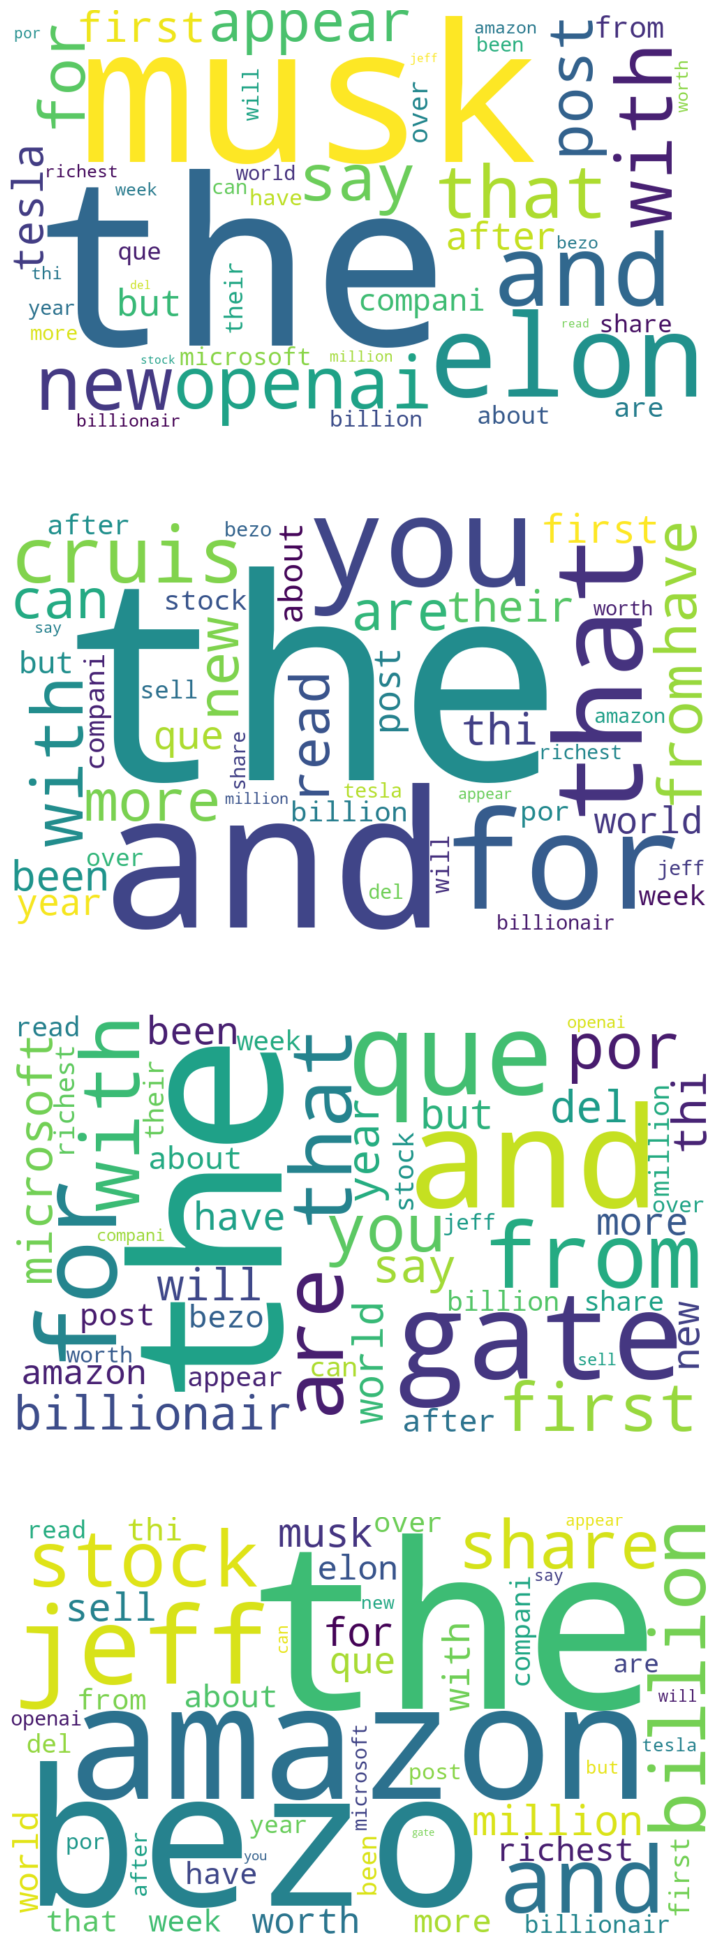

In [159]:
#### Forth------------------------------------------------------>Visualization using word cloud####

# here we can use any dataframe in the place of "Final_News_DF_Labeled" but this visualization needs topics
# No need to do any change in below code apart from dataframe


List_of_WC=[]

for mytopic in topics:

    # here we are taking sum of our features grouping by labels
    tempdf = Final_News_DF_Labeled[Final_News_DF_Labeled['LABEL'] == mytopic]    
    tempdf =tempdf.sum(axis=0,numeric_only=True)
    
    #Make var name
    NextVarName=str("wc"+str(mytopic))
    #print( NextVarName)

    
    ###########
    ## Create and store in a list the wordcloud OBJECTS
    #########
    NextVarName = WordCloud(width=1000, height=600, background_color="white",
                   min_word_length=4,
                   max_words=200).generate_from_frequencies(tempdf)
    
    ## Here, this list holds all three wordclouds I am building
    List_of_WC.append(NextVarName)
    
print(List_of_WC)


##########
########## Create the wordclouds
##########
fig=plt.figure(figsize=(25, 25))
#figure, axes = plt.subplots(nrows=2, ncols=2)
NumTopics=len(topics)
for i in range(NumTopics):
    print(i)
    ax = fig.add_subplot(NumTopics,1,i+1)
    plt.imshow(List_of_WC[i], interpolation='bilinear')
    plt.axis("off")
    plt.savefig("NewClouds.pdf")
 


### Clustering

In [105]:
#Fifth-----------------------------------------------------------> Clustering

#----------------------------------------------------------------> K-means
print(My_Orig_DF)
# first way: without normalizing
My_KMean= KMeans(n_clusters=2)
My_KMean.fit(My_Orig_DF)
My_labels=My_KMean.predict(My_Orig_DF)
print(My_labels)



     aban  abbia  ability  able  aboard  abuse  abwerfen  ac  accelerate  \
0       0      0        0     0       0      0         0   0           0   
1       0      0        0     0       0      0         0   0           0   
2       0      0        0     0       0      0         0   0           0   
3       0      0        0     0       0      0         0   0           0   
4       0      0        0     0       0      0         0   0           0   
..    ...    ...      ...   ...     ...    ...       ...  ..         ...   
394     0      0        0     0       0      0         0   0           0   
395     0      0        0     0       0      0         0   0           0   
396     0      0        0     0       1      0         0   0           0   
397     0      0        0     0       0      0         0   0           0   
398     0      0        0     0       0      0         0   0           0   

     acceleration  ...  zealand  ziemlich  zo  zoe  zone  zu  zuckerberg  \
0          

C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [23]:

#Second way: with normalization
My_KMean2 = KMeans(n_clusters=2).fit(preprocessing.normalize(My_Orig_DF))
My_KMean2.fit(My_Orig_DF)
My_labels2=My_KMean2.predict(My_Orig_DF)
print(My_labels2)



C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setti

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score for k = 2 
 0.22511680847367643


C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setti

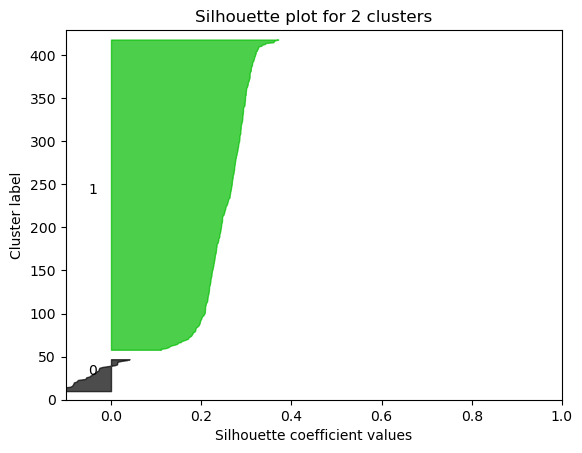

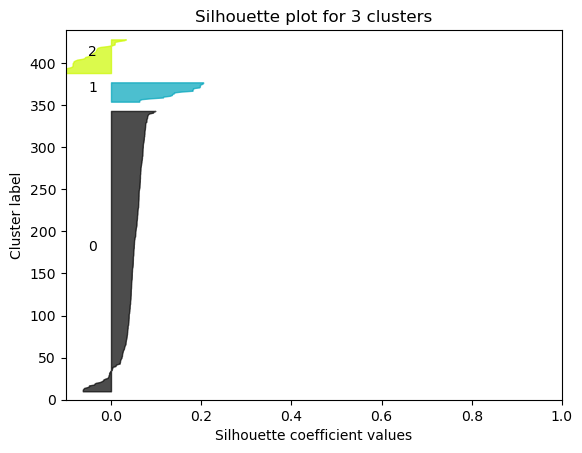

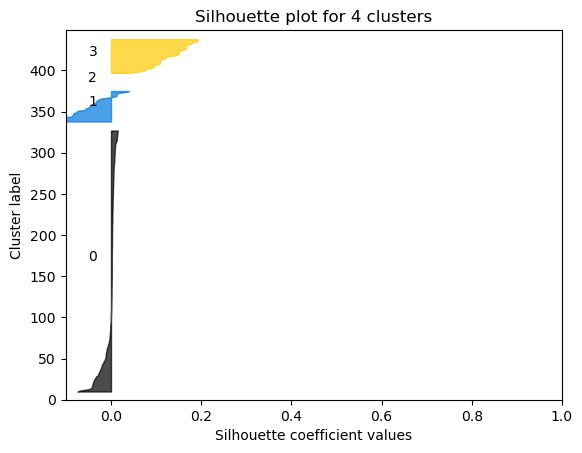

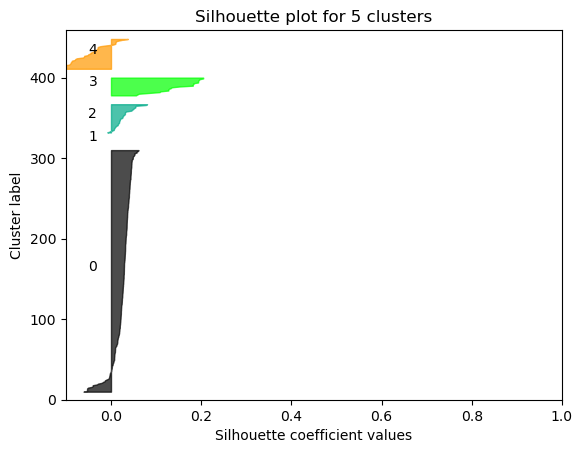

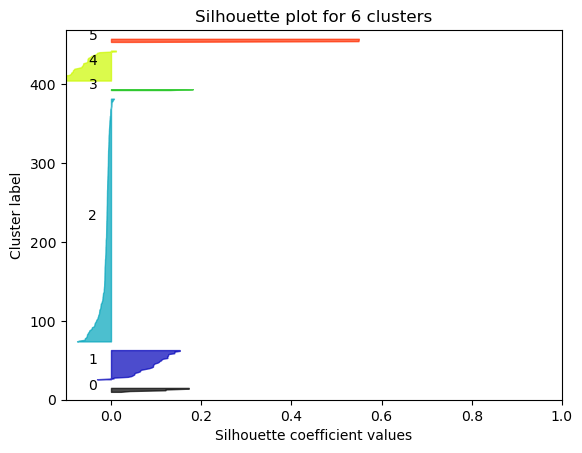

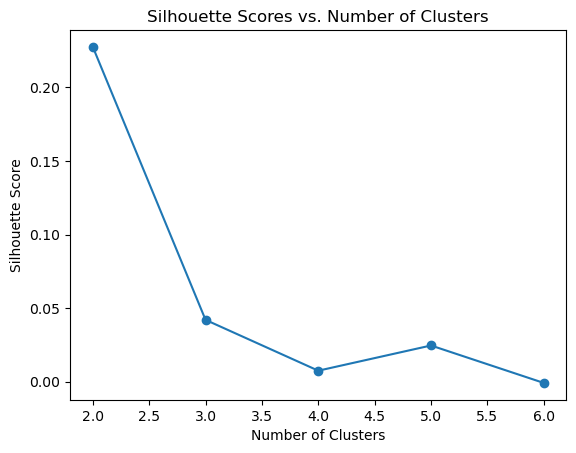

In [24]:
#############################################
## Silhouette and clusters
#############################################

#from sklearn.metrics import silhouette_samples, silhouette_score

## Using MyDTM_DF which is not labeled

# =============================================================================

My_KMean3= KMeans(n_clusters=2)
My_KMean3.fit(My_Orig_DF)
My_labels3=My_KMean3.predict(My_Orig_DF)
print("Silhouette Score for k = 2 \n",silhouette_score(My_Orig_DF, My_labels3))

# =============================================================================

## plotting Silhouette for 2 to 6 clusters

# List to store silhouette scores
silhouette_scores = []

# Range of clusters
range_n_clusters = [2, 3, 4, 5, 6]  # Example range

# Compute silhouette scores for each number of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(My_Orig_DF)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(My_Orig_DF, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(My_Orig_DF, cluster_labels)
    
    # Plot silhouette plot
    fig, ax = plt.subplots(1, 1)
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(My_Orig_DF) + (n_clusters + 1) * 10])
    
    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax.set_title("Silhouette plot for {} clusters".format(n_clusters))
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

plt.show()

# Plot silhouette scores vs. number of clusters
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


[[-2.22044605e-16  9.41678816e-01  9.19417704e-01 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 9.41678816e-01  0.00000000e+00  8.68409661e-01 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 9.19417704e-01  8.68409661e-01 -2.22044605e-16 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 ...
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ... -2.22044605e-16
   1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   2.22044605e-16  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  2.22044605e-16]]
[[-0.     0.942  0.919 ...  1.     1.     1.   ]
 [ 0.942  0.     0.868 ...  1.     1.     1.   ]
 [ 0.919  0.868 -0.    ...  1.     1.     1.   ]
 ...
 [ 1.     1.     1.    ... -0.     1.     1.   ]
 [ 1.     1.     1.    ...  1.     0.     1.   ]
 [ 1.     1.     1.    ...  1.     1.     0.   ]]
[[ 28.         316.           0.           2.        ]
 [ 18.   

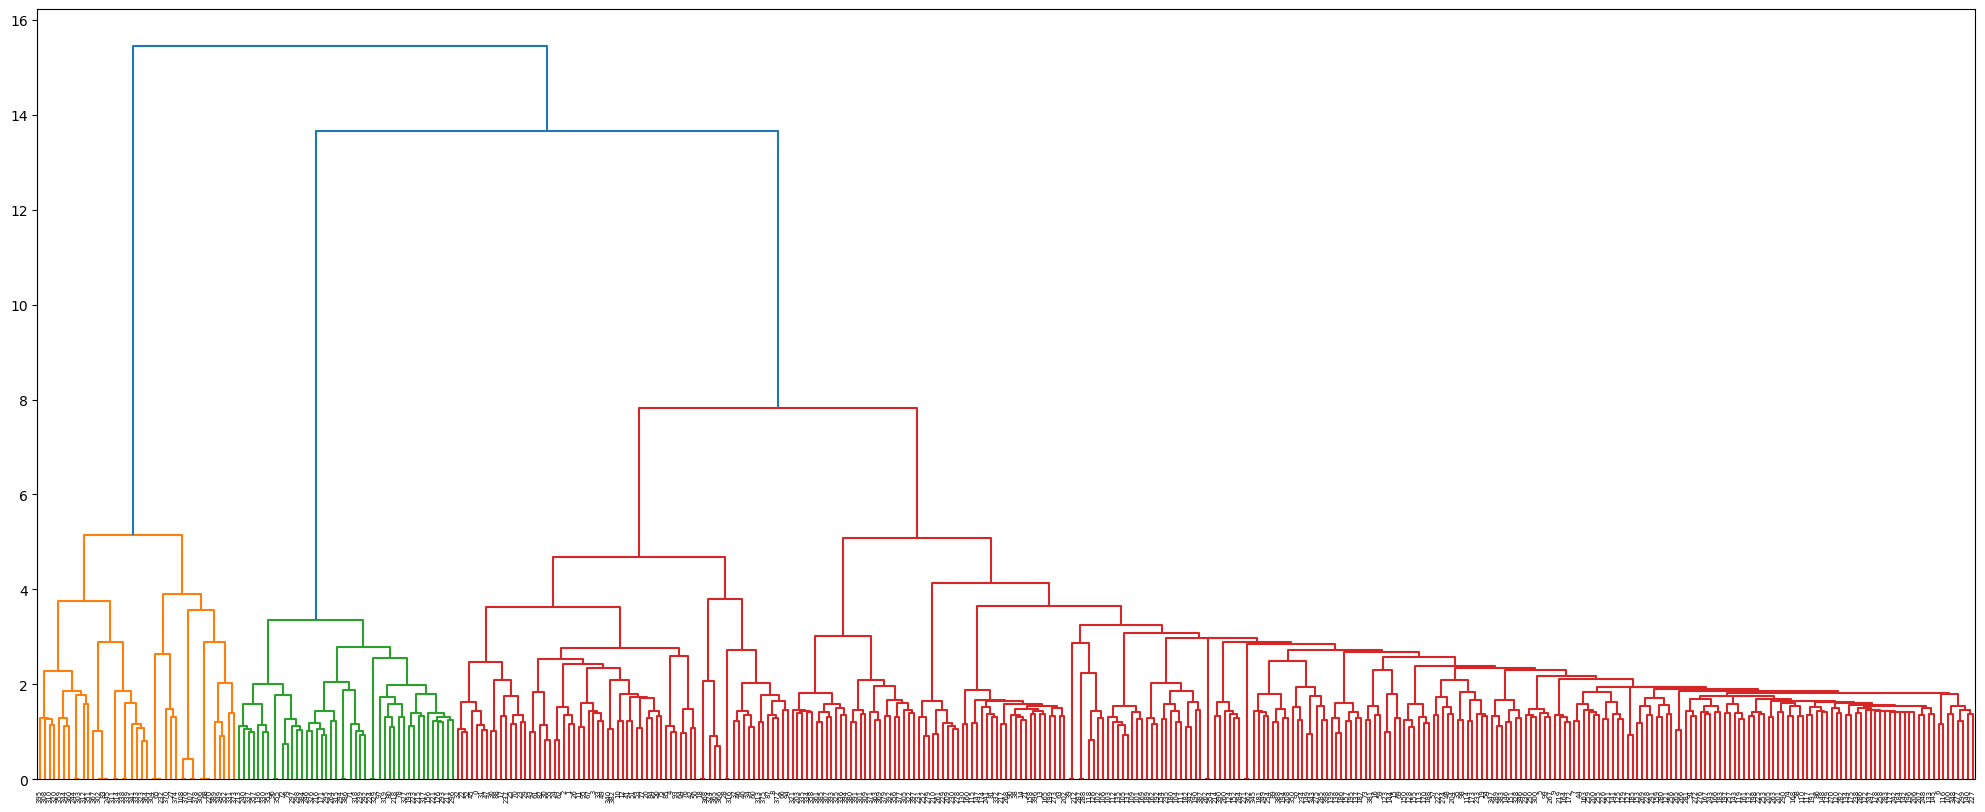

In [106]:
#----------------------------------------------------------------------> Heirarchical

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#length of the document: called cosine similarity
cosdist = 1 - cosine_similarity(MyDTM_DF)
print(cosdist)
print(np.round(cosdist,3))  #cos dist should be .02

#----------------------------------------------------------
## Hierarchical Clustering using ward and cosine sim
linkage_matrix = ward(cosdist) #define the linkage_matrix 
#using ward clustering pre-computed distances
print(linkage_matrix)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linkage_matrix)
plt.show()


### LDA

In [171]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Assuming MyDTM_DF is your document-term matrix created using CountVectorizer

# Create an instance of CountVectorizer and fit it on your data
#count_vectorizer = CountVectorizer()
#MyDTM = count_vectorizer.fit_transform(My_Orig_DF)

num_topics = 4
#HeadlineLIST
lda_model_DH = LatentDirichletAllocation(n_components=num_topics, 
                                         max_iter=100, learning_method='online')
LDA_DH_Model = lda_model_DH.fit_transform(count_vect_df)

print("SIZE: ", LDA_DH_Model.shape)  # (NO_DOCUMENTS, NO_TOPICS)

# Define a function to print topics
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic: ", idx)
        feature_names = vectorizer.get_feature_names_out()
        print([(feature_names[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]])

# Call the function to print topics
print_topics(lda_model_DH, count_vectorizer, 15)


SIZE:  (399, 4)
Topic:  0
[('actualit', 67.08826061570414), ('actual', 29.375081555895484), ('according', 21.07427916480084), ('actions', 16.674827603329586), ('acerca', 13.379478632427142), ('acquisition', 5.55685954639704), ('account', 4.975218383304947), ('accused', 3.7201266306537164), ('acus', 0.9550615174722065), ('adaptaci', 0.803015227120967), ('actualidad', 0.262774158412902), ('adelante', 0.2540147567679173), ('ac', 0.2538109452974608), ('accustomed', 0.2533110495033918), ('added', 0.2531272592645376)]
Topic:  1
[('ac', 123.80336799163796), ('accustomed', 95.36195555171443), ('ability', 78.85186924734464), ('adamant', 35.889785553982954), ('aconsejara', 31.802781727530103), ('acusado', 24.909952946045504), ('ad', 24.474307503563153), ('accelerate', 23.16588519601949), ('administraci', 23.05408168409147), ('aban', 20.137945782945774), ('adds', 16.98433733177237), ('actriz', 14.953103218444246), ('actualidad', 13.393474472256901), ('addressing', 9.318968621718012), ('acerca', 8

In [175]:
############## Fancy Plot.................
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
#import pyLDAvis.sklearn as LDAvis
import pyLDAvis

# ## conda install -c conda-forge pyldavis
pyLDAvis.enable_notebook() ## not using notebook



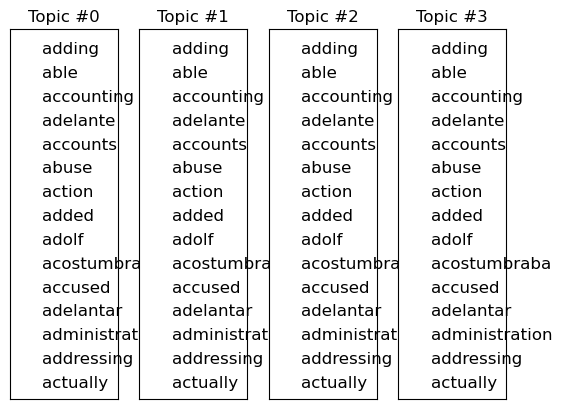

In [174]:
################ Another fun vis for LDA

word_topic = np.array(lda_model_DH.components_)
#print(word_topic)
word_topic = word_topic.transpose()
My_Orig_DF
num_top_words = 15
vocab_array = np.asarray(ColumnNames)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 12

for t in range(num_topics):
    plt.subplot(1, num_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    #top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    #top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

#plt.tight_layout()
#plt.show()
plt.savefig("TopicsVis.pdf")

In [27]:
#### Seventh---------------------------------------------------> ARM 

import pandas as pd

# First-------------------------------->  Convert dataframe into transactional data
transactions = []

for _, row in Final_News_DF_Labeled.iterrows():
    transaction = [row['LABEL']]
    for col in Final_News_DF_Labeled.columns:
        if row[col] == 1:
            transaction.append(col)
    transactions.append(transaction)

# we got the list of transactions
# Converting the transactions list into a dataframe
transaction_df = pd.DataFrame(transactions)

transaction_df.head(10)


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,musk,commission,comply,december,elon,exchange,federal,followup,judge,order,...,None,None,None,None,None,None,None,None,None,None
1,musk,began,elon,limiting,number,rate,real,reason,summer,tweets,...,None,None,None,None,None,None,None,None,None,None
2,musk,brain,computer,control,elon,frustrated,human,information,lack,mouse,...,None,None,None,None,None,None,None,None,None,None
3,musk,administration,apnea,detection,devices,drug,feature,food,galaxy,given,...,None,None,None,None,None,None,None,None,None,None
4,musk,accused,agreed,appears,colossal,company,final,games,joint,judgment,...,None,None,None,None,None,None,None,None,None,None
5,musk,al,cases,change,changed,explanation,latest,penalties,people,quietly,...,None,None,None,None,None,None,None,None,None,None
6,musk,allow,answer,cases,chatbots,chips,generative,groq,helpers,instantly,...,None,None,None,None,None,None,None,None,None,None
7,musk,audio,elon,exclusively,fetch,giving,going,infamous,know,latest,...,None,None,None,None,None,None,None,None,None,None
8,musk,clip,elon,featuring,immediately,looks,low,new,notice,pixelated,...,None,None,None,None,None,None,None,None,None,None
9,musk,accounts,action,billionaire,doesn,elon,florida,having,information,isn,...,tracked,None,None,None,None,None,None,None,None,None


In [33]:
#### create csv from transaction data and then import it in R

transaction_df.to_csv('transaction_data.csv', index=False)